We must show evidence of:

- Load and preprocess the dataset for the classification problem (handle missing data, convert categorical features to numerical features).
- Build a classifier for the classification problem using one of the specified models (logistic regression, decision trees, random forests, or artificial neural networks).
- Fine-tune the selected model using appropriate techniques (eg, hyperparameter tuning, cross-validation, etc).
- Visualise the dataset and / or the model's results, where applicable (eg, feature importance, confusion matrix, etc).
- Report the final performance of the selected model using appropriate performance metrics (eg, accuracy, F1-score, etc).

- Load and preprocess the dataset for the multi-label image-based digit classification problem (normalise pixel values, resize images if necessary, etc).
- Build a convolutional neural network (CNN) model for the multi-label image-based digit classification task.
- Fine-tune the CNN model using appropriate techniques (eg, hyperparameter tuning, cross-validation, etc).
- Visualise the dataset and / or the CNN model's results, where applicable (eg, feature maps, learning curves, etc).
- Report the final performance of the CNN model using appropriate performance metrics (eg, accuracy, F1-score, etc).
- Collaborate within the team and decide on the best model (for classification) and CNN architecture (for digit recognition).
- Submit the code as Jupyter Notebooks.


Notebook should also contain:

- All of your materials which demonstrate successful completion of the tasks above.
- The Jupyter Notebook file should contain all output cells.
- The code you produce to solve the above tasks should make good use of structure, logic and commenting to be clear and robust.
- Variable names should be thoughtfully considered and appropriate for the purpose. Ensure that scope conflicts are avoided, and that variable names don’t leak into other code areas. It will help to consider how the structures covered throughout the module may be used. Similarly, it would be best to be mindful of error handling where appropriate.
- The use of markdown cells is advised to keep a clear distinction between tasks.
- It is expected that you will use commenting in markdown cells to explain how you have handled the task.
- This notebook should include detailed comments that outline the individual contributions of each team member, the learning experiences that resulted from collaboration, and the reasoning behind the choice of the final models. Be sure to mention any specific insights or improvements gained through your collaborative efforts.
- Use only your student ID number to identify yourself. Do not include your name in your coursework or the file name.

# *771948_A23_T3A: Machine Learning & Deep Learning - Coursework 1*
### Authors: 202326742 & 
***

## 1 - Classification of Dataset1

### 1.1 - Importing and Exploring the Data

To start, the team imported pandas and subsequently the dataset, exploring it together first by understanding the different datatypes present within each column:

In [200]:
import pandas as pd

raw_data = pd.read_excel("dataset1.xlsx")
raw_data.head()

,target,var1,var2,var3,var4,var5,var6,var7
0,0,509.18,417.681,Micronesia,138.0,393.00,no,2019-07-20 13:21:37
1,0,446.06,666.182,Dominica,81.0,352.05,yes,2019-04-04 21:30:46
2,1,235.50,398.097,Isle of Man,90.0,339.00,no,2019-03-03 02:59:37
3,0,306.02,518.163,Turkmenistan,102.0,439.25,yes,2019-03-19 08:00:58
4,0,453.08,600.156,Cameroon,105.0,422.95,no,2019-03-18 13:22:35


In [201]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  925 non-null    int64  
 1   var1    925 non-null    float64
 2   var2    925 non-null    float64
 3   var3    925 non-null    object 
 4   var4    325 non-null    float64
 5   var5    925 non-null    float64
 6   var6    925 non-null    object 
 7   var7    925 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 57.9+ KB


Use of the '.info()' function also shows the 600 null values present within the 'var4' column, which is something that will be addressed. For now, the team focused on the numerical columns and explored the statistics of them:

In [202]:
raw_data.describe()

,target,var1,var2,var4,var5
count,925.000000,925.000000,925.000000,325.000000,925.000000
mean,0.496216,360.116562,548.390134,108.452308,325.393946
std,0.500256,87.866662,135.221460,26.325744,78.862779
min,0.000000,209.560000,139.965000,57.000000,163.000000
25%,0.000000,278.640000,467.373000,87.000000,257.900000
50%,0.000000,367.640000,569.841000,105.000000,342.350000
75%,1.000000,437.600000,652.278000,126.000000,393.000000
max,1.000000,539.920000,794.848000,180.000000,457.150000


Due to the 'int64' datatype shown in the 'target' column and the min and max values discovered, this is a binary classification problem. Observing this table, there appears to be some non-normal distributions within some of the columns. This is explored using histograms, with left-skew on 'var4' and the right-skews to varying degrees on 'var1', 'var2', and 'var5' being noted:

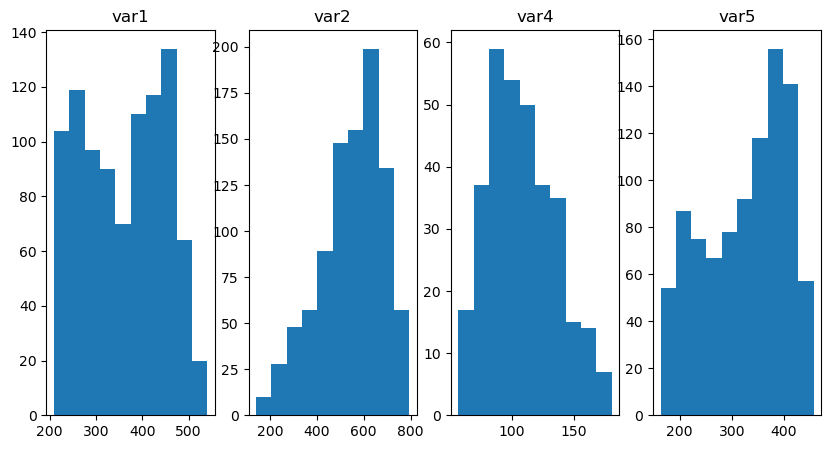

In [203]:
import matplotlib.pyplot as plt

var_nums = [1, 2, 4, 5]
fig, axs = plt.subplots(1, 4, figsize=(10, 5))

for i in range(4):
    
    axs[i].hist(raw_data[f'var{var_nums[i]}'])
    axs[i].set_title(f'var{var_nums[i]}')

plt.show()

### 1.2 - Data Cleaning & Preprocessing

First, the team focused on the missing values within 'var4', and together brainstormed different ways to replace these. Mean replacement was tried first, simply replacing all the nan values with the mean value of the column. However, as shown by the boxplots before and after, this significantly impacted the distribution of the data due to the large proportion of nan values present.

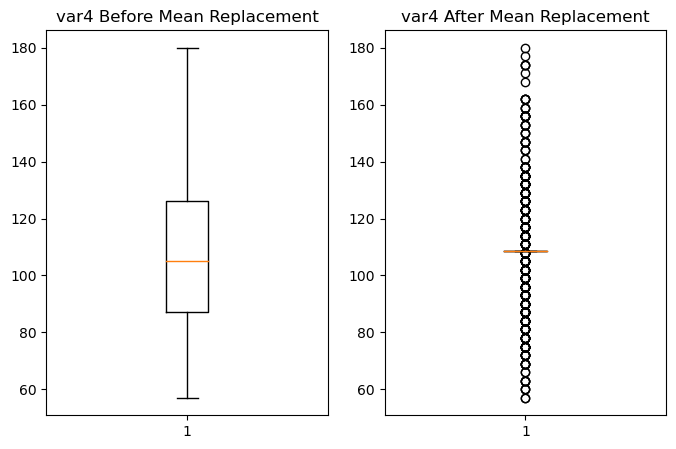

In [204]:
mean_value = raw_data['var4'].mean()

data_copy = raw_data['var4'].copy()  # creating a new data object for testing modifications.
data_copy = data_copy.fillna(mean_value)

fig, axs = plt.subplots(1, 2, figsize=(8, 5))
axs[0].boxplot(raw_data['var4'].dropna())
axs[0].set_title('var4 Before Mean Replacement')

axs[1].boxplot(data_copy)
axs[1].set_title('var4 After Mean Replacement')

plt.show()

Similar problems were encountered when using median replacement. The next idea was Random Sample Imputation (RSI), which is where for each null value, an existing value is randomly selected to replace it with.

Text(0.5, 1.0, 'var4 After RSI')

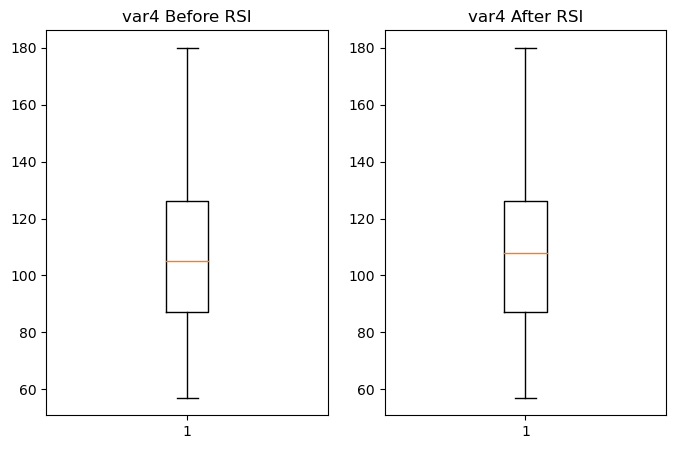

In [205]:
import numpy as np
import random

original_var4 = raw_data['var4']
data_copy = raw_data['var4'].copy()

for index, row in raw_data.iterrows():
    if np.isnan(row['var4']):
        random_sample = original_var4.iloc[random.randrange(len(original_var4.dropna()))]  # randomly selects a value from original subset.
        data_copy[index] = random_sample  # replaces the nan value with the random sample.

fig, axs = plt.subplots(1, 2, figsize=(8, 5))
axs[0].boxplot(raw_data['var4'].dropna())
axs[0].set_title('var4 Before RSI')

axs[1].boxplot(data_copy)
axs[1].set_title('var4 After RSI')

As shown above, this has the benefit of approximately preserving the distribution of the data, however does result in a lot of meaningless data being added. Therefore, the team decided to use this but noted that if the model does not prove effective then this is a key aspect to review.

In [206]:
clean_data = raw_data.copy()  # creating a copy of the data to add our final preprocessing modifications.
clean_data['var4'] = data_copy

Now var7 was considered, which from the exploration earlier is known to contain date and time information. This was decided not to be useful to the model, and so removed:

In [207]:
clean_data.drop(columns=['var7'], inplace=True)

Next was var3, which upon initial inspection appears to contain country names. This was explored by establishing the number of unique entries that appear in this column:

In [208]:
len(clean_data["var3"].unique())

236

236 is a large number, and encoding that many values would dramatically increase the dimensionality of what otherwise is a simple dataset. Therefore, this column is removed too, but noted that it is another aspect to consider if model performance is poor.

In [209]:
clean_data.drop(columns=['var3'], inplace=True)

Now var6 was considered, which initially appears to simply contain the binary entries of 'yes' and 'no'. This was checked:

In [210]:
from collections import Counter
Counter(clean_data["var6"])

Counter({'yes': 483, 'no': 442})

Therefore the team proceeded to one-hot encode this column, in order to convert from a string datatype to a numerical one:

In [211]:
clean_data = pd.get_dummies(clean_data, columns=['var6'], drop_first=False)  # creates a new column for each unique entry in var6.
clean_data['var6_no'] = clean_data['var6_no'].astype(int)  # converts from bool to int.
clean_data['var6_yes'] = clean_data['var6_yes'].astype(int)

With all of this cleaning and preprocessing complete, here is the new condition of the dataset:

In [212]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   target    925 non-null    int64  
 1   var1      925 non-null    float64
 2   var2      925 non-null    float64
 3   var4      925 non-null    float64
 4   var5      925 non-null    float64
 5   var6_no   925 non-null    int32  
 6   var6_yes  925 non-null    int32  
dtypes: float64(4), int32(2), int64(1)
memory usage: 43.5 KB


Next the team decided to apply scaling to all of the variables, to ensure they are all within the interval [0,1]. This benefits certain types of models by allowing each variable to contribute equally and reducing bias.

In [213]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()  # initiating the scaler.

for col in clean_data:
  clean_data[col] = scaler.fit_transform(clean_data[[col]])  # rescaling every column.

clean_data.describe()

The last aspect of the dataset the team explored before moving onto model planning was any correlations between variables:

In [215]:
clean_data.corr()

,target,var1,var2,var4,var5,var6_no,var6_yes
target,1.000000,-0.784098,-0.495492,0.172523,-0.747803,-0.044705,0.044705
var1,-0.784098,1.000000,0.344854,-0.159093,0.519466,0.038392,-0.038392
var2,-0.495492,0.344854,1.000000,-0.100331,0.328229,0.003327,-0.003327
var4,0.172523,-0.159093,-0.100331,1.000000,-0.141679,-0.021776,0.021776
var5,-0.747803,0.519466,0.328229,-0.141679,1.000000,-0.017954,0.017954
var6_no,-0.044705,0.038392,0.003327,-0.021776,-0.017954,1.000000,-1.000000
var6_yes,0.044705,-0.038392,-0.003327,0.021776,0.017954,-1.000000,1.000000


The interesting points from this matrix are the correlation coefficients of -0.78 between 'target' and 'var1', and -0.75 between 'target' and 'var5'. These high values indicate there is a reasonably strong correlation present, which was investigated further using a plot:

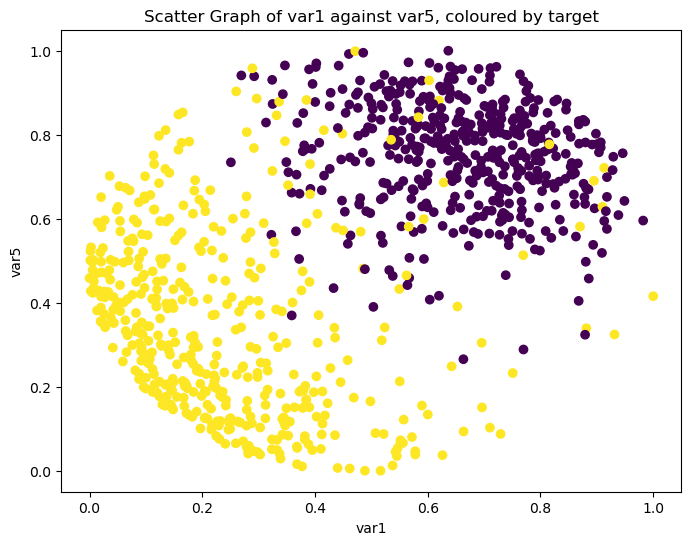

In [216]:
plt.figure(figsize=(8, 6))
plt.scatter(clean_data['var1'], clean_data['var5'], c=clean_data['target'])
plt.title('Scatter Graph of var1 against var5, coloured by target')
plt.xlabel('var1')
plt.ylabel('var5')
plt.show()

Finally, the data is separated into inputs and outputs and split into training and testing sets.

In [217]:
from sklearn.model_selection import train_test_split

X, y = clean_data.drop('target', axis=1), clean_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (647, 6)
Shape of X_test: (278, 6)
Shape of y_train: (647,)
Shape of y_test: (278,)


### 1.3 - Decision Tree Model

Due to the high correlation between a couple of the variables and 'target' as found above, the team decided a decision tree model should be trialled first. The benefits of a decision tree model are the low complexity, and easy explainability. 

In [218]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

model_dt = DecisionTreeClassifier(random_state=20)  # initiating the model.
model_dt = model_dt.fit(X_train, y_train)  # fitting the model to the training data.
y_pred_dt = model_dt.predict(X_test)  # using the model to generate outputs for the test inputs.
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_dt))  # evaluating the accuracy on the test data.

Accuracy: 0.9388489208633094


The initial model with no parameter tuning has produced a test accuracy of 93.9%, which is very promising. Grid Search was chosen as the method of parameter tuning, with the parameters being:
- max_depth: the maximum number of splits allowed across any path through the tree.
- min_samples_split: the minimum number of samples required for a split to be allowed.
- min_samples_leaf: the minimum number of samples allowed for a node before it becomes a leaf.

In [219]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': np.arange(1, 6),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(2, 10)
}

model_dt = DecisionTreeClassifier(random_state=20)  # initiate the model.
grid_search = GridSearchCV(model_dt, param_grid)  # initiate the grid search.
grid_search.fit(X_train, y_train)  # fit the grid search object to the training data.
best_params = grid_search.best_params_  # extract the best hyperparameters.
print("Best hyperparameters:", best_params)

model_dt_best = DecisionTreeClassifier(**best_params, random_state=20)  # initiate new model with best parameters.
model_dt_best.fit(X_train, y_train)  # fit the model to the training data.
y_pred_dt = model_dt_best.predict(X_test)  # use model to make test predictions.
print("Accuracy of the decision tree classifier:", metrics.accuracy_score(y_test, y_pred_dt))  # evaluate accuracy of model on test data.

Best hyperparameters: {'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 7}
Accuracy of the decision tree classifier: 0.9532374100719424


This has successfully improved the decision tree model to a test accuracy of 95.3%, with the best parameters shown above. The model is drawn below, to gain an insight into which variables are being utilised:

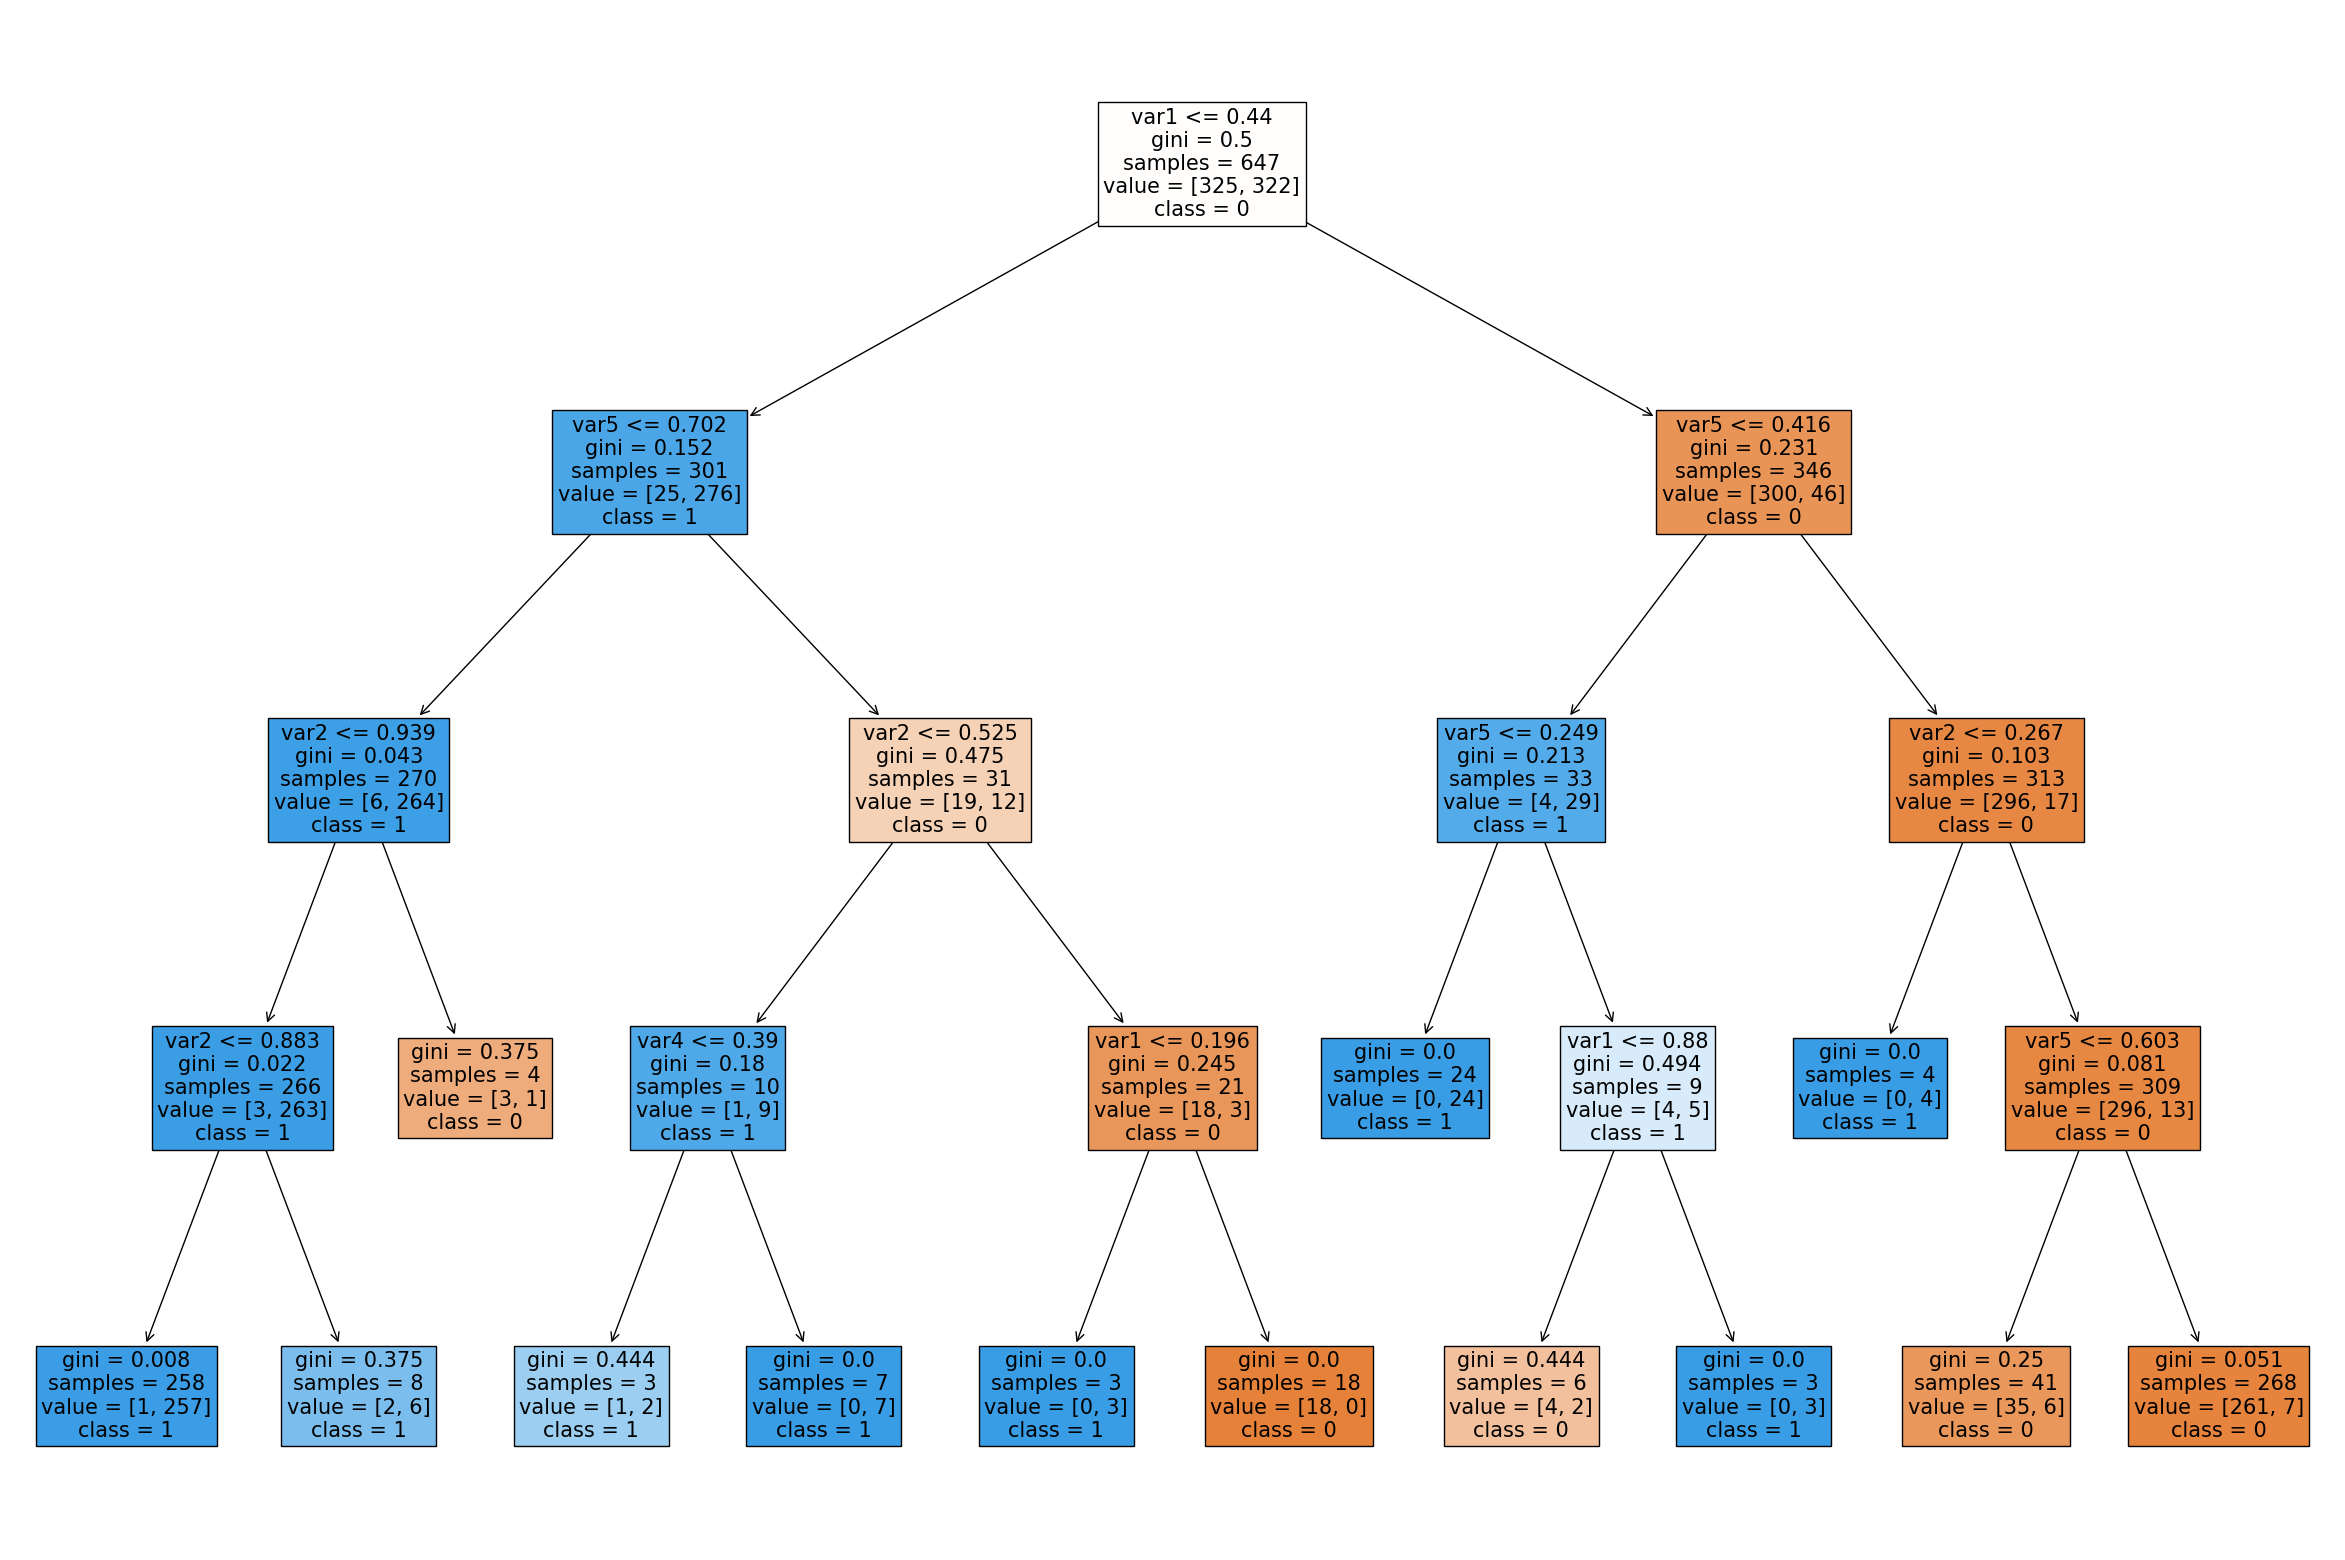

In [220]:
from sklearn import tree

fig = plt.figure(figsize=(30, 20))
tree.plot_tree(model_dt_best, feature_names=list(X.columns), class_names=['0', '1'], fontsize=15, filled=True)
plt.show()

This plot shows that each of the variables is getting used with the exception of 'var6_no' and 'var6_yes'. This makes sense when considering their correlation with the target variable, which were only -0.04 and 0.04 respectively. To review the test performance further, a confusion matrix was used:

In [221]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_dt)  # generate the confusion matrix.
cm_df = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])  # convert to a DataFrame.
print(cm_df.to_string())

          Predicted 0  Predicted 1
Actual 0          139            2
Actual 1           11          126


The confusion matrix perhaps shows a slight bias towards predicting 0.

### 1.4 - Random Forest Model

The team decided that the next logical step would be to turn this model into an ensemble in the form of random forest, which adds the benefit of minimising bias and variance within predictions, reducing the risk of overfitting or underfitting. The disadvantage of these models is the increased memory and processing resources needed to store and train multiple base models.

Once again grid search was used to find the optimal combination of parameters, this time with some more considered:
- n_estimators: the number of base models making up the random forest.
- criterion: how the impurity of a node is determined.

The range of the previous values considered was also increased.

In [222]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 15, 20, 30],
    'max_depth': np.arange(2, 8),
    'criterion': ['gini', 'entropy'],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(2, 20, 2)
}

model_rf = RandomForestClassifier(random_state=20)  # initiate the random forest model.
grid_search = GridSearchCV(model_rf, param_grid, cv=3)  # initiate the grid search.
grid_search.fit(X_train, y_train)  # fit the grid search to the training data.
best_params = grid_search.best_params_  # extract the best hyperparameters.
print("Best hyperparameters:", best_params)

model_rf_best = RandomForestClassifier(**best_params, random_state=20)  # initiate random forest with best parameters.
model_rf_best.fit(X_train, y_train)  # fit the random forest to the training data.
y_pred_rf = model_rf_best.predict(X_test)  # make predictions on the test data.
print("Accuracy of the random forest classifier:", metrics.accuracy_score(y_test, y_pred_rf))  # evaluate the accuracy on the test data.

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 10}
Accuracy of the random forest classifier: 0.9748201438848921


Turning the model into an ensemble has improved the accuracy of the model on the test data further, now achieving 97.5%. Once again, a confusion matrix was used to explore the nature of the outputs:

In [223]:
cm = confusion_matrix(y_test, y_pred_rf)  # generate the confusion matrix.
cm_df = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])  # convert to a DataFrame.
print(cm_df.to_string())

          Predicted 0  Predicted 1
Actual 0          139            2
Actual 1            5          132


The confusion matrix shows no bias towards either of the output classes. To verify the performance of the model, the team decided to apply k-fold cross-validation to the random forest, with 5 splits.

In [224]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits=5)
scores = cross_val_score(model_rf_best, X, y, cv=k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

Cross Validation Scores:  [0.97297297 0.95135135 0.95135135 0.96756757 0.92972973]
Average CV Score:  0.9545945945945945


The average accuracy score of 95.5% during k-fold cross-validation means the team is now confident in their final model.

### 1.5 - Conclusions for Task 1

After exploring the dataset, the team applied the following preprocessing methods to optimise it for model training:
- Removal of unnecessary variables.
- Random sample imputation to replace missing values within 'var4'.
- One-hot encoding of 'var6' to convert data from string to int.
- Min-max scaling on all columns to scale values into the interval [0,1].

A decision tree model tuned using grid search was applied first, with the best model specifications being:
- max_depth: 4
- min_samples_split: 7
- min_samples_leaf: 3

This model had an accuracy of 95.3% on the test data.


The model was developed into an ensemble model in the form of a random forest, once again tuned using grid search with the best model specifications being:
- max_depth: 5
- min_samples_split: 10
- min_samples_leaf: 2
- criterion: entropy
- n_estimators: 10

After using k-fold cross-validation to evaluate perfomance on the test data, the average accuracy of the model was 95.5%.

***
## 2 - Recognising 3-Digit Numbers Using CNNs

### 2.1 - Importing and Understanding the Dataset

### 2.2 - 